# Data Preprocessing

## Importing Data

In [52]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

In [53]:
pd.set_option('display.max_rows', None)
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [54]:
# data shape
df.shape

(1460, 81)

In [55]:
df.drop(columns='Id',inplace=True)

Data description (Optional)

## Hanling Missing Value

Print only the column name with missing values

In [56]:
# Calculate the missing value counts for each feature
missing_value_counts = df.isna().sum()

# Filter the missing value counts to show only features with missing values
features_with_missing_values = missing_value_counts[missing_value_counts > 0]

features_with_missing_values.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Dropping columns

In [57]:
specific_column = ['GarageQual', 'BsmtCond']
col_to_drop = df.columns[df.isnull().any() & ~df.columns.isin(specific_column)].tolist()
col_to_drop

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [58]:
df.drop(columns=col_to_drop, inplace=True)

Impute missing value

In [59]:
df['BsmtCond']     = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['GarageQual']   = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [60]:
df.shape

(1460, 63)

## Encoding Categorical Variables

Select all obj type features

In [61]:
# see all column name
categorical = df.select_dtypes('object').columns
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Seperate the ordinal type from the rest since we will have to encode it differently

In [62]:
ordinal = ['LandSlope','ExterQual','ExterCond','HeatingQC','KitchenQual','GarageQual']
# categories of the ordinal features
categories1 = ['Po','Fa','TA','Gd','Ex']
categories2 = ['Gtl','Mod','Sev']

In [63]:
non_ordinal = list([x for x in categorical if x not in ordinal])
non_ordinal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Create new dataframe to encode/label




In [64]:
df_en= df.copy()

Start labeling

In [65]:
# import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [66]:
import pandas as pd
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=non_ordinal)

# Fit and transform the ordinal variables using target encoding
data_encoded = target_encoder.fit_transform(df_en[non_ordinal], df_en['SalePrice'])

# Replace the original ordinal variables with the encoded values in the original DataFrame
df_en[non_ordinal] = data_encoded[non_ordinal]
df_en[non_ordinal]

MSZoning         Street       LotShape    LandContour  \
0     191004.994787  181130.538514  164754.818378  180183.746758   
1     191004.994787  181130.538514  164754.818378  180183.746758   
2     191004.994787  181130.538514  206101.665289  180183.746758   
3     191004.994787  181130.538514  206101.665289  180183.746758   
4     191004.994787  181130.538514  206101.665289  180183.746758   
5     191004.994787  181130.538514  206101.665289  180183.746758   
6     191004.994787  181130.538514  164754.818378  180183.746758   
7     191004.994787  181130.538514  206101.665289  180183.746758   
8     126316.830413  181130.538514  164754.818378  180183.746758   
9     191004.994787  181130.538514  164754.818378  180183.746758   
10    191004.994787  181130.538514  164754.818378  180183.746758   
11    191004.994787  181130.538514  206101.665289  180183.746758   
12    191004.994787  181130.538514  233406.235381  180183.746758   
13    191004.994787  181130.538514  206101.665289  180183.746758   
14    191004.994787  181130.538514  206101.665289  180183.746758   
15    126316.830413  181130.538514  164754.818378  180183.746758   
16    191004.994787  181130.538514  206101.665289  180183.746758   
17    191004.994787  181130.538514  164754.818378  180183.746758   
18    191004.994787  181130.538514  164754.818378  180183.746758   
19    191004.994787  181130.538514  164754.818378  180183.746758   
20    191004.994787  181130.538514  206101.665289  180183.746758   
21    126316.830413  181130.538514  164754.818378  143610.333996   
22    191004.994787  181130.538514  164754.818378  180183.746758   
23    126316.830413  181130.538514  164754.818378  180183.746758   
24    191004.994787  181130.538514  206101.665289  180183.746758   
25    191004.994787  181130.538514  164754.818378  180183.746758   
26    191004.994787  181130.538514  164754.818378  180183.746758   
27    191004.994787  181130.538514  164754.818378  180183.746758   
28    191004.994787  181130.538514  206101.665289  180183.746758   
29    126316.830413  181130.538514  206101.665289  180183.746758   
30    152307.658564  181130.538514  164754.818378  180183.746758   
31    191004.994787  181130.538514  206101.665289  180183.746758   
32    191004.994787  181130.538514  164754.818378  180183.746758   
33    191004.994787  181130.538514  206101.665289  180183.746758   
34    191004.994787  181130.538514  164754.818378  180183.746758   
35    191004.994787  181130.538514  164754.818378  180183.746758   
36    191004.994787  181130.538514  164754.818378  180183.746758   
37    191004.994787  181130.538514  164754.818378  180183.746758   
38    191004.994787  181130.538514  164754.818378  180183.746758   
39    191004.994787  181130.538514  164754.818378  180183.746758   
40    191004.994787  181130.538514  164754.818378  180183.746758   
41    191004.994787  181130.538514  164754.818378  180183.746758   
42    191004.994787  181130.538514  206101.665289  180183.746758   
43    191004.994787  181130.538514  206101.665289  180183.746758   
44    191004.994787  181130.538514  164754.818378  180183.746758   
45    191004.994787  181130.538514  164754.818378  180183.746758   
46    191004.994787  181130.538514  206101.665289  180183.746758   
47    213650.472122  181130.538514  164754.818378  180183.746758   
48    126316.830413  181130.538514  164754.818378  180183.746758   
49    191004.994787  181130.538514  164754.818378  180183.746758   
50    191004.994787  181130.538514  233406.235381  180183.746758   
51    126316.830413  181130.538514  164754.818378  180183.746758   
52    126316.830413  170885.846899  233406.235381  143610.333996   
53    191004.994787  181130.538514  206101.665289  199841.223430   
54    191004.994787  181130.538514  164754.818378  143610.333996   
55    191004.994787  181130.538514  206101.665289  180183.746758   
56    213650.472122  181130.538514  164754.818378  180183.746758   
57    191004.994787  181130.538514  206101.665289  180183.746758   

In [67]:
# Encode ordinal categorical features
oe = OrdinalEncoder(categories=[categories1])
for col in ordinal:
  if col != 'LandSlope':
    df_en[col] = oe.fit_transform(df[col].values.reshape(-1,1))

oe = OrdinalEncoder(categories=[categories2])
df_en['LandSlope'] = oe.fit_transform(df['LandSlope'].values.reshape(-1,1))
df_en[ordinal]

LandSlope  ExterQual  ExterCond  HeatingQC  KitchenQual  GarageQual
0           0.0        3.0        2.0        4.0          3.0         2.0
1           0.0        2.0        2.0        4.0          2.0         2.0
2           0.0        3.0        2.0        4.0          3.0         2.0
3           0.0        2.0        2.0        3.0          3.0         2.0
4           0.0        3.0        2.0        4.0          3.0         2.0
5           0.0        2.0        2.0        4.0          2.0         2.0
6           0.0        3.0        2.0        4.0          3.0         2.0
7           0.0        2.0        2.0        4.0          2.0         2.0
8           0.0        2.0        2.0        3.0          2.0         1.0
9           0.0        2.0        2.0        4.0          2.0         3.0
10          0.0        2.0        2.0        4.0          2.0         2.0
11          0.0        4.0        2.0        4.0          4.0         2.0
12          0.0        2.0        2.0        2.0          2.0         2.0
13          0.0        3.0        2.0        4.0          3.0         2.0
14          0.0        2.0        2.0        2.0          2.0         2.0
15          0.0        2.0        2.0        4.0          2.0         2.0
16          0.0        2.0        2.0        4.0          2.0         2.0
17          0.0        2.0        2.0        2.0          2.0         2.0
18          0.0        2.0        2.0        4.0          3.0         2.0
19          0.0        2.0        2.0        2.0          2.0         2.0
20          0.0        3.0        2.0        4.0          3.0         2.0
21          0.0        2.0        2.0        4.0          3.0         2.0
22          0.0        3.0        2.0        4.0          3.0         2.0
23          0.0        2.0        2.0        2.0          2.0         2.0
24          0.0        2.0        3.0        4.0          3.0         2.0
25          0.0        3.0        2.0        4.0          3.0         2.0
26          0.0        2.0        2.0        2.0          3.0         2.0
27          0.0        3.0        2.0        4.0          3.0         2.0
28          0.0        2.0        2.0        2.0          2.0         2.0
29          0.0        2.0        2.0        1.0          1.0         1.0
30          0.0        2.0        1.0        2.0          2.0         2.0
31          0.0        2.0        2.0        3.0          3.0         2.0
32          0.0        3.0        2.0        4.0          3.0         2.0
33          0.0        2.0        2.0        3.0          3.0         2.0
34          0.0        4.0        2.0        4.0          4.0         2.0
35          0.0        3.0        2.0        4.0          3.0         2.0
36          0.0        2.0        2.0        4.0          2.0         2.0
37          0.0        2.0        2.0        3.0          2.0         2.0
38          0.0        2.0        3.0        2.0          3.0         2.0
39          0.0        2.0        2.0        2.0          1.0         2.0
40          0.0        2.0        2.0        4.0          2.0         2.0
41          0.0        2.0        3.0        3.0          2.0         2.0
42          0.0        2.0        2.0        3.0          3.0         2.0
43          0.0        2.0        2.0        2.0          2.0         2.0
44          0.0        2.0        2.0        4.0          2.0         2.0
45          0.0        4.0        2.0        4.0          4.0         2.0
46          0.0        3.0        2.0        4.0          3.0         2.0
47          0.0        3.0        2.0        4.0          3.0         2.0
48          0.0        2.0        2.0        3.0          2.0         2.0
49          0.0        2.0        2.0        4.0          2.0         2.0
50          0.0        2.0        2.0        3.0          2.0         2.0
51          0.0        2.0        2.0        2.0          2.0         2.0
52          1.0        1.0        2.0        2.0          2.0         2.0
53        

In [68]:
df_en.head()

MSSubClass       MSZoning  LotArea         Street       LotShape  \
0          60  191004.994787     8450  181130.538514  164754.818378   
1          20  191004.994787     9600  181130.538514  164754.818378   
2          60  191004.994787    11250  181130.538514  206101.665289   
3          70  191004.994787     9550  181130.538514  206101.665289   
4          60  191004.994787    14260  181130.538514  206101.665289   

     LandContour     Utilities      LotConfig  LandSlope   Neighborhood  ...  \
0  180183.746758  180950.95682  176938.047529        0.0  197965.734807  ...   
1  180183.746758  180950.95682  178122.652042        0.0  197643.209810  ...   
2  180183.746758  180950.95682  176938.047529        0.0  197965.734807  ...   
3  180183.746758  180950.95682  181623.425855        0.0  209344.287867  ...   
4  180183.746758  180950.95682  178122.652042        0.0  318453.591177  ...   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

        SaleType  SaleCondition  SalePrice  
0  173401.836622  175202.219533     208500  
1  173401.836622  175202.219533     181500  
2  173401.836622  175202.219533     223500  
3  173401.836622  146537.060693     140000  
4  173401.836622  175202.219533     250000  

[5 rows x 63 columns]

## Split variables

In [69]:
X = df_en
y = X.pop('SalePrice')

# EDA

## Feature Selection

### Mutual Information

<Axes: title={'center': 'Model Coefficient'}>

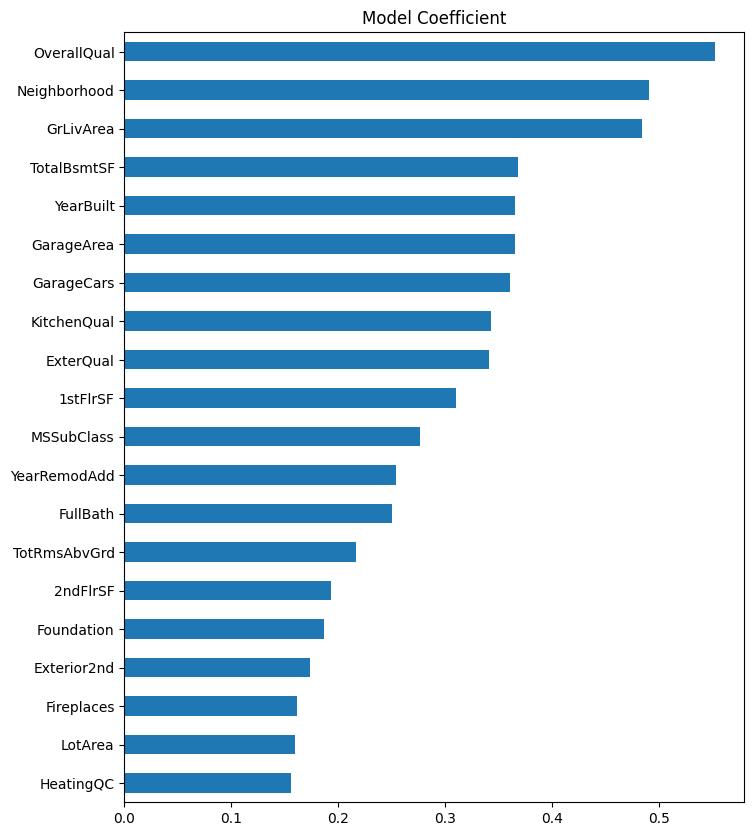

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression

# get score and fit into dataframe in respect to the variable names
scores = mutual_info_regression(X, y)
scores_df = Series(scores,X.columns).sort_values(ascending=False).head(20)
# plot mi score
scores_df.sort_values(ascending=True).plot(kind='barh', title='Model Coefficient',figsize=[8,10])

### Z_Score

In [71]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

In [72]:
# get coeficient and standard errors
coefficients = results.params
standard_errors = results.bse

In [73]:
# z_score
from scipy.stats import zscore
z_scores = zscore(coefficients / standard_errors)

<Axes: title={'center': 'Z_Score'}>

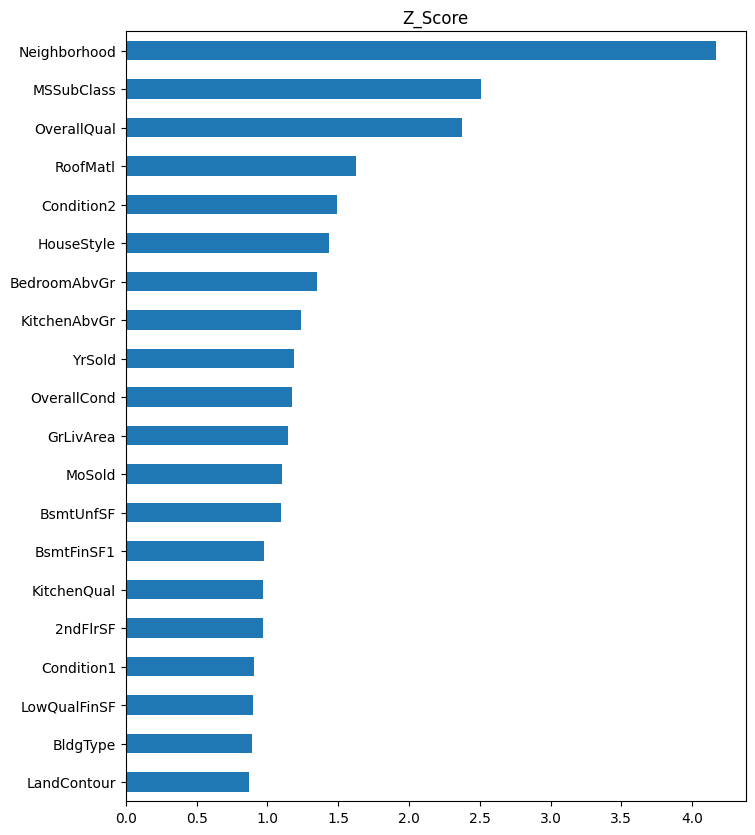

In [74]:
# plot
feature_importance = abs(z_scores)
importance = feature_importance.sort_values(ascending=False).head(20)


importance.sort_values(ascending=True).plot(kind='barh', title='Z_Score',figsize=[8,10])

### Selection

Combine both result

In [75]:
z_score = feature_importance.reset_index()
z_score.columns = ['Feature', 'Z_Score']

mi = Series(scores,X.columns).reset_index()
mi.columns = ['Feature', 'MI']

In [76]:
feature_score = pd.merge(z_score, mi)
feature_score.head()

Feature   Z_Score        MI
0  MSSubClass  2.506781  0.276894
1    MSZoning  0.519042  0.121568
2     LotArea  0.033343  0.159141
3      Street  0.260957  0.011595
4    LotShape  0.566893  0.076814

Standardize both score to the same scaling between 0-1

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

feature_score.iloc[:, -2:] = scaler.fit_transform(feature_score.iloc[:, -2:])
feature_score.head()

Feature   Z_Score        MI
0  MSSubClass  0.597762  0.501303
1    MSZoning  0.117380  0.220093
2     LotArea  0.000000  0.288116
3      Street  0.055008  0.020993
4    LotShape  0.128944  0.139067

Create Combined Score and plot

<Axes: title={'center': 'Scores'}, ylabel='Feature'>

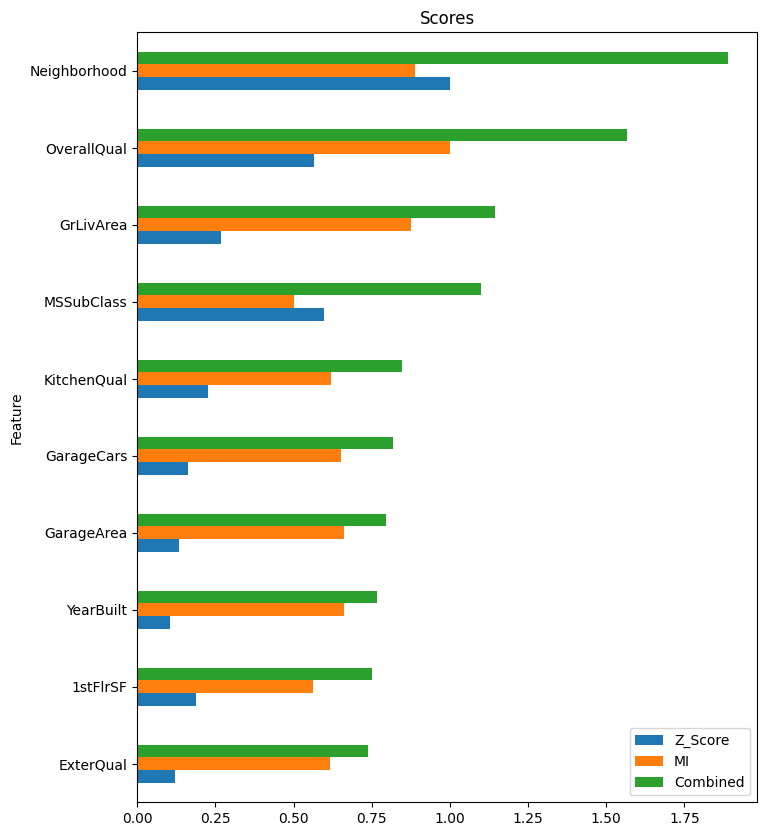

In [78]:
feature_score['Combined'] = feature_score['MI'] + feature_score['Z_Score']
# the score already selected to just 20 features but i toned it down here to 10 inside the .head()
feature_score = feature_score.sort_values(by='Combined', ascending=False).head(10)
feature_score.sort_values(by='Combined', ascending=True).plot(x='Feature',kind='barh', title='Scores', figsize=(8,10))

Based on the combined scores, we will select only the top 10 features to study furthur in our Analysis.

In [79]:
columns = feature_score['Feature'].tolist()
X = X[columns]
X_unlabeled = df[columns]
columns.append('SalePrice')
df_unlabeled = df[columns]

## Visualization and Model Assumption

### Distribution

Response Variable Distribution

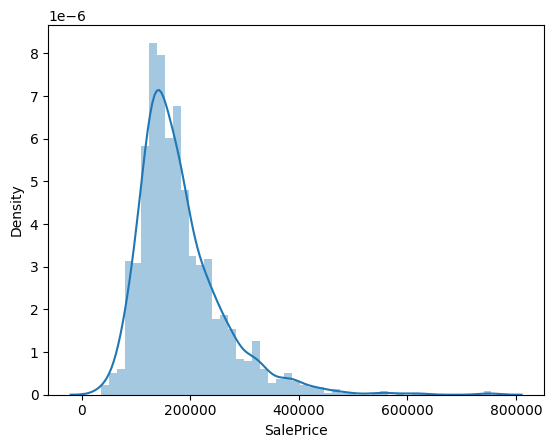

In [80]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(y);

In [81]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

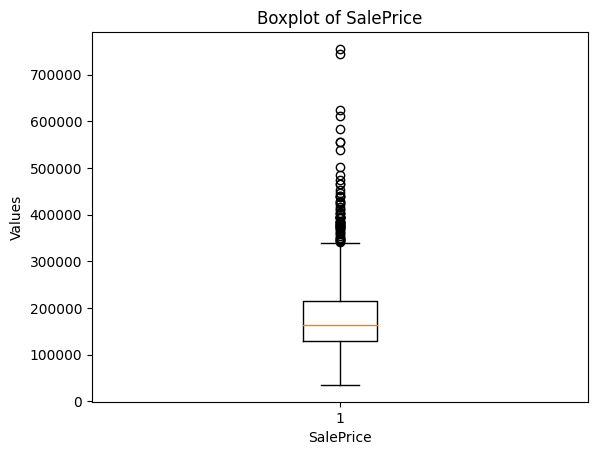

In [82]:
plt.boxplot(y)
plt.xlabel('SalePrice')
plt.ylabel('Values')
plt.title('Boxplot of SalePrice')
plt.show()

try binning to visualize outlier more

In [83]:
bins = np.arange(0,10)*100000
labels = ['0-10k','10-20k','20-30k','30-40k','40-50k','50-60k','60-70k','70-80k','80-90k']
price_bin = pd.cut(x=y, bins=bins, labels=labels, include_lowest=True)
price_bin.value_counts()

SalePrice
10-20k    910
20-30k    312
0-10k     123
30-40k     87
40-50k     19
50-60k      5
60-70k      2
70-80k      2
80-90k      0
Name: count, dtype: int64

From the result, we can see that only 28 out of 1460 houses sell for over 40k and only and only 9 of them listed as over 50k. Over half of them priced under 20k.

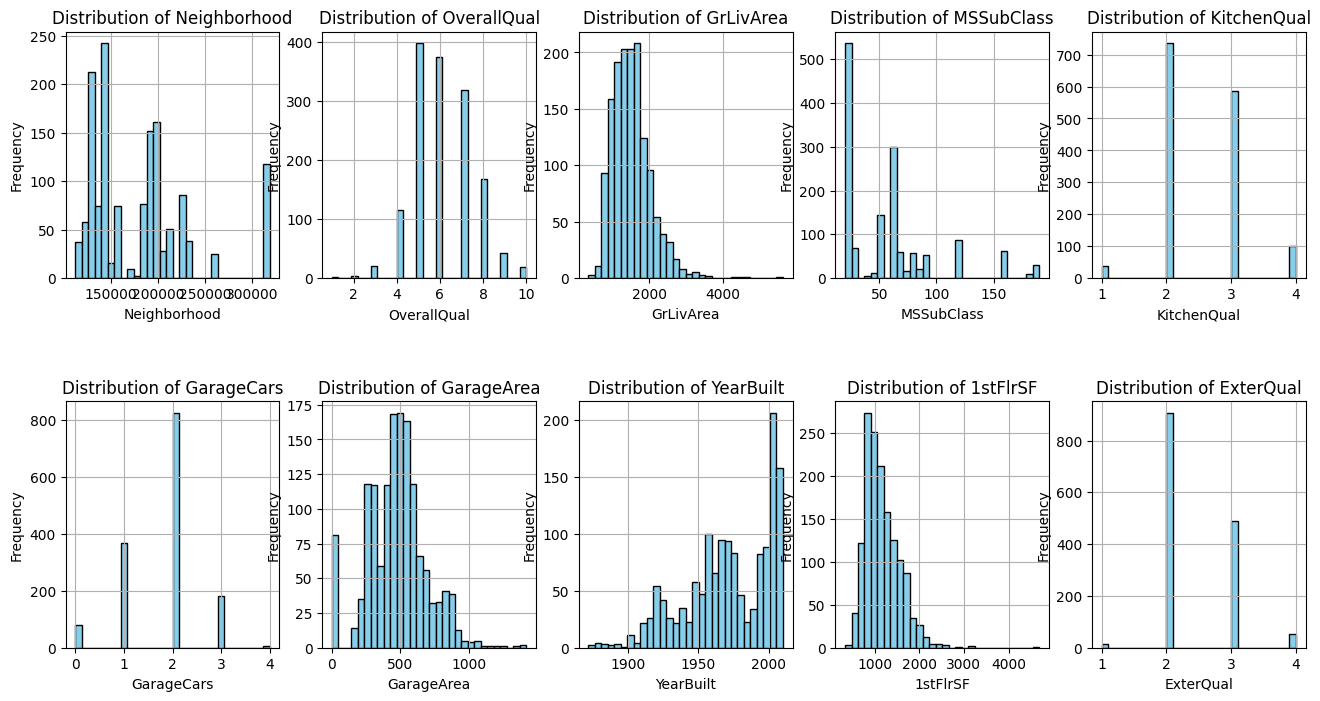

In [84]:
import matplotlib.pyplot as plt

def plot_numerical_features(dataframe):
    columns = X.columns
    num_features = len(columns)
    num_rows = 2
    num_cols = 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        axes[row, col].hist(dataframe[column], bins=30, color='skyblue', edgecolor='black')
        axes[row, col].set_title(f"Distribution of {column}", fontsize=12)
        axes[row, col].set_xlabel(column, fontsize=10)
        axes[row, col].set_ylabel("Frequency", fontsize=10)
        axes[row, col].grid(True)

    # If the number of features is less than 10, remove empty subplot(s)
    for i in range(num_features, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.show()

# Assuming you have a pandas DataFrame called 'df'
plot_numerical_features(X)


**Note** :
- **Neigborhood** and **MSSSubClass** are  encoded non-ordinal Categorical Variables
- **OverQual, ExterQual** and **KitchenQual** are ordianl Variables

### Features Relationship

##### Categorical Features

In [85]:
obj_columns = X_unlabeled.select_dtypes(include=['object']).columns.tolist()
# encoded describe
X[obj_columns].describe()

Neighborhood  KitchenQual   ExterQual
count    1460.000000  1460.000000  1460.00000
mean   180660.087056     2.511644     2.39589
std     53458.438476     0.663760     0.57428
min    112604.177463     1.000000     1.00000
25%    136991.546950     2.000000     2.00000
50%    186444.004409     2.000000     2.00000
75%    197965.734807     3.000000     3.00000
max    318453.591177     4.000000     4.00000

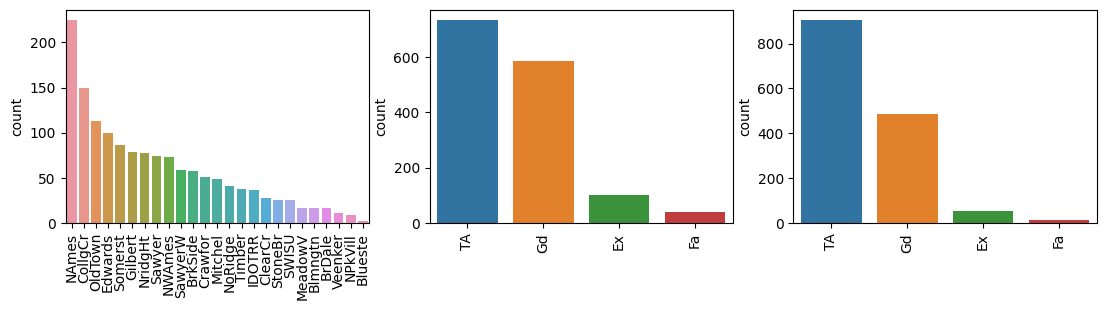

In [86]:
# plot Value Count
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in obj_columns:
  count = X_unlabeled[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(count.index), y=count)
  index +=1

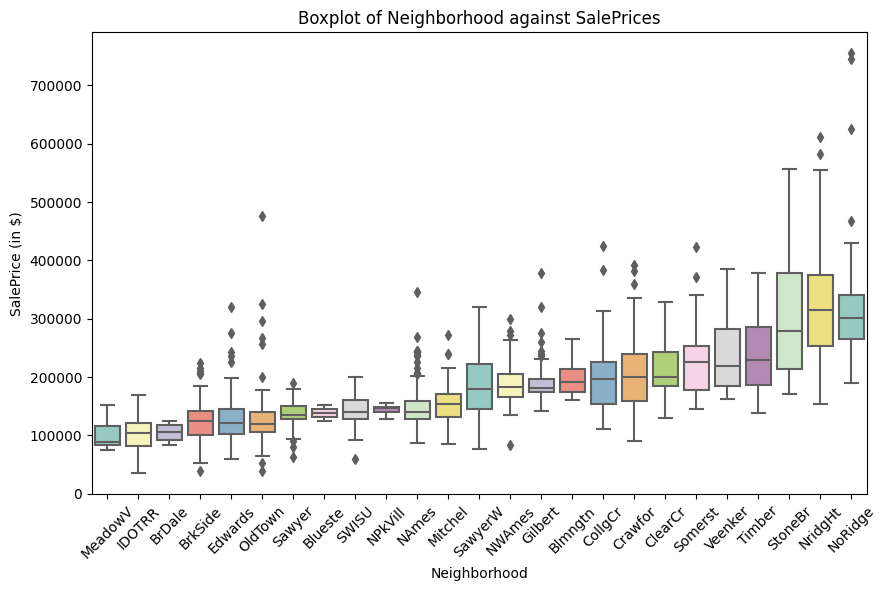

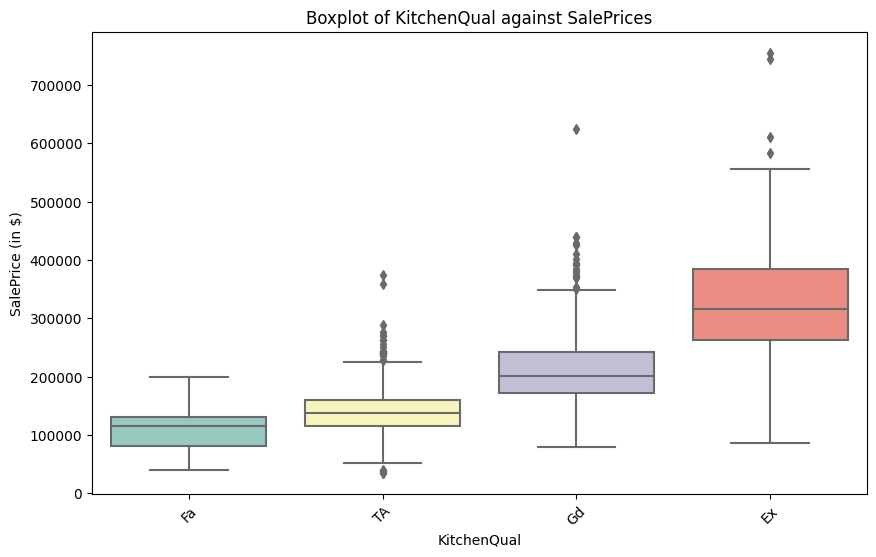

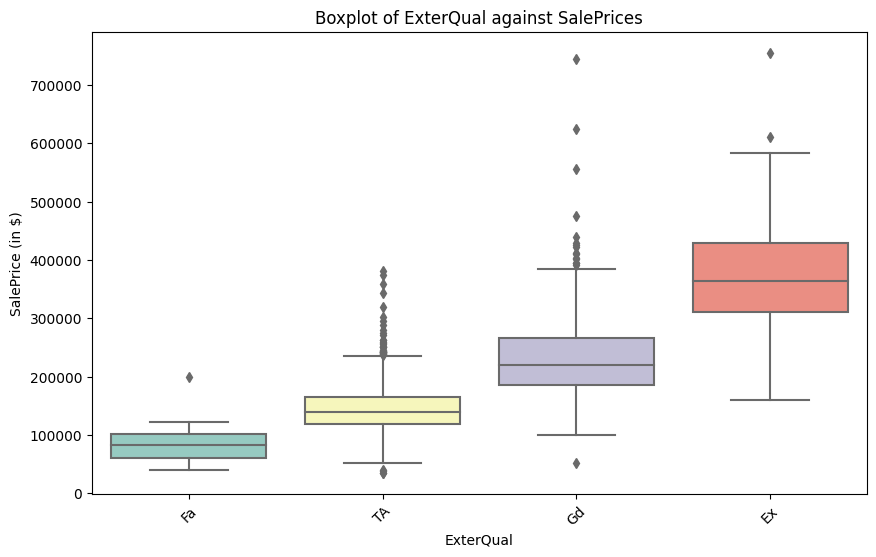

In [87]:
for col in obj_columns:
    # Subset the DataFrame to include both the response variable and the nominal column
    subset_df = df_unlabeled[[col, 'SalePrice']]

    # Calculate the mean or median sale prices for each neighborhood
    col_means = subset_df.groupby(col)['SalePrice'].mean()

    # Sort the neighborhoods based on mean or median sale prices
    sorted_col = col_means.sort_values().index

    # Create a boxplot using seaborn with ordered neighborhoods
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.boxplot(x=col, y='SalePrice', data=subset_df, palette='Set3', order=sorted_col)
    plt.title('Boxplot of '+col+' against SalePrices')  # Set the title of the plot
    plt.xlabel(col)  # Set the label for the x-axis
    plt.ylabel('SalePrice (in $)')  # Set the label for the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
    plt.show()  # Show the plot

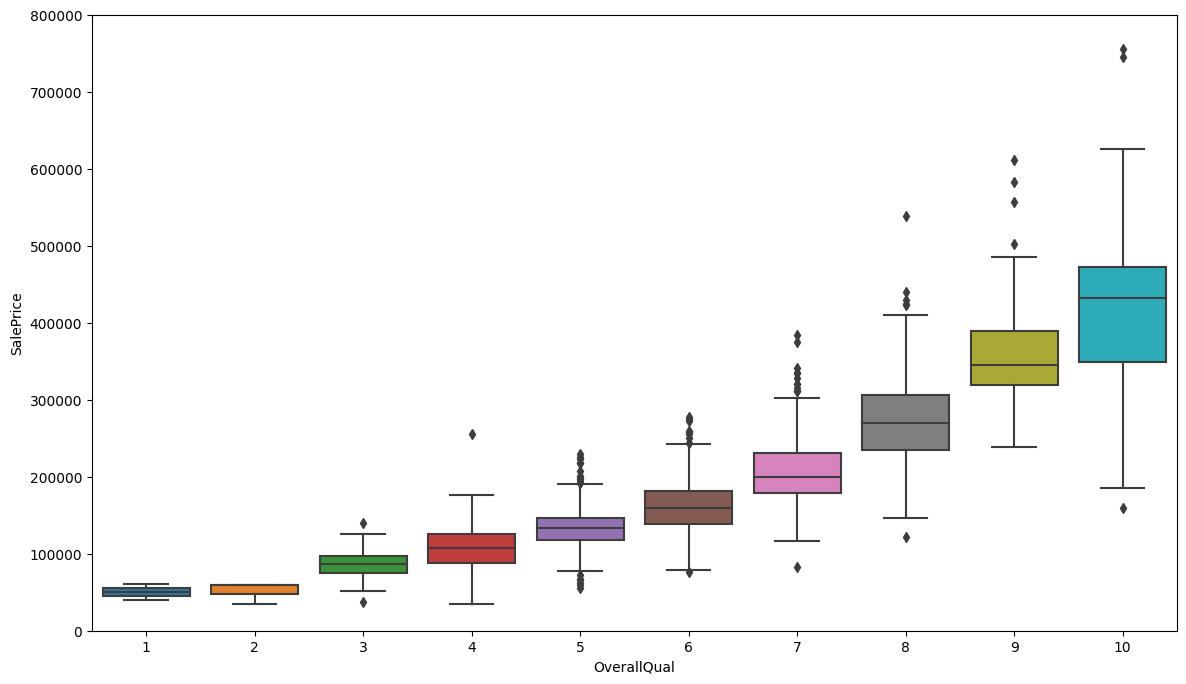

In [88]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Numerical Features

In [89]:
X_unlabeled.describe()

OverallQual    GrLivArea   MSSubClass   GarageCars   GarageArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.099315  1515.463699    56.897260     1.767123   472.980137   
std       1.382997   525.480383    42.300571     0.747315   213.804841   
min       1.000000   334.000000    20.000000     0.000000     0.000000   
25%       5.000000  1129.500000    20.000000     1.000000   334.500000   
50%       6.000000  1464.000000    50.000000     2.000000   480.000000   
75%       7.000000  1776.750000    70.000000     2.000000   576.000000   
max      10.000000  5642.000000   190.000000     4.000000  1418.000000   

         YearBuilt     1stFlrSF  
count  1460.000000  1460.000000  
mean   1971.267808  1162.626712  
std      30.202904   386.587738  
min    1872.000000   334.000000  
25%    1954.000000   882.000000  
50%    1973.000000  1087.000000  
75%    2000.000000  1391.250000  
max    2010.000000  4692.000000

In [90]:
num_columns = X_unlabeled.select_dtypes(include=['number']).columns.tolist()

num_columns.append('SalePrice')
sns.pairplot(df[num_columns], size = 2);

#### Correlation Heatmap

In [91]:
df_en

MSSubClass       MSZoning  LotArea         Street       LotShape  \
0             60  191004.994787     8450  181130.538514  164754.818378   
1             20  191004.994787     9600  181130.538514  164754.818378   
2             60  191004.994787    11250  181130.538514  206101.665289   
3             70  191004.994787     9550  181130.538514  206101.665289   
4             60  191004.994787    14260  181130.538514  206101.665289   
5             50  191004.994787    14115  181130.538514  206101.665289   
6             20  191004.994787    10084  181130.538514  164754.818378   
7             60  191004.994787    10382  181130.538514  206101.665289   
8             50  126316.830413     6120  181130.538514  164754.818378   
9            190  191004.994787     7420  181130.538514  164754.818378   
10            20  191004.994787    11200  181130.538514  164754.818378   
11            60  191004.994787    11924  181130.538514  206101.665289   
12            20  191004.994787    12968  181130.538514  233406.235381   
13            20  191004.994787    10652  181130.538514  206101.665289   
14            20  191004.994787    10920  181130.538514  206101.665289   
15            45  126316.830413     6120  181130.538514  164754.818378   
16            20  191004.994787    11241  181130.538514  206101.665289   
17            90  191004.994787    10791  181130.538514  164754.818378   
18            20  191004.994787    13695  181130.538514  164754.818378   
19            20  191004.994787     7560  181130.538514  164754.818378   
20            60  191004.994787    14215  181130.538514  206101.665289   
21            45  126316.830413     7449  181130.538514  164754.818378   
22            20  191004.994787     9742  181130.538514  164754.818378   
23           120  126316.830413     4224  181130.538514  164754.818378   
24            20  191004.994787     8246  181130.538514  206101.665289   
25            20  191004.994787    14230  181130.538514  164754.818378   
26            20  191004.994787     7200  181130.538514  164754.818378   
27            20  191004.994787    11478  181130.538514  164754.818378   
28            20  191004.994787    16321  181130.538514  206101.665289   
29            30  126316.830413     6324  181130.538514  206101.665289   
30            70  152307.658564     8500  181130.538514  164754.818378   
31            20  191004.994787     8544  181130.538514  206101.665289   
32            20  191004.994787    11049  181130.538514  164754.818378   
33            20  191004.994787    10552  181130.538514  206101.665289   
34           120  191004.994787     7313  181130.538514  164754.818378   
35            60  191004.994787    13418  181130.538514  164754.818378   
36            20  191004.994787    10859  181130.538514  164754.818378   
37            20  191004.994787     8532  181130.538514  164754.818378   
38            20  191004.994787     7922  181130.538514  164754.818378   
39            90  191004.994787     6040  181130.538514  164754.818378   
40            20  191004.994787     8658  181130.538514  164754.818378   
41            20  191004.994787    16905  181130.538514  164754.818378   
42            85  191004.994787     9180  181130.538514  206101.665289   
43            20  191004.994787     9200  181130.538514  206101.665289   
44            20  191004.994787     7945  181130.538514  164754.818378   
45           120  191004.994787     7658  181130.538514  164754.818378   
46            50  191004.994787    12822  181130.538514  206101.665289   
47            20  213650.472122    11096  181130.538514  164754.818378   
48           190  126316.830413     4456  181130.538514  164754.818378   
49            20  191004.994787     7742  181130.538514  164754.818378   
50            60  191004.994787    13869  181130.538514  233406.235381   
51            50  126316.830413     6240  181130.538514  164754.818378   
52            90  126316.830413     8472  170885.846899  233406.235381   
53        

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_unlabeled.select_dtypes('number').corr(), annot=True, cmap='coolwarm')

<Axes: >

### Multicollinearity (VIF)

In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the predictor variables
predictors = X

# Add a constant term for the intercept in the regression model
predictors = sm.add_constant(predictors)

# Calculate the VIF scores
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF scores
vif.sort_values(by='VIF', ascending=False)

Variable          VIF
0          const  8669.543825
6     GarageCars     5.128398
7     GarageArea     4.856132
2    OverallQual     3.332643
10     ExterQual     2.913770
1   Neighborhood     2.494275
5    KitchenQual     2.352896
8      YearBuilt     2.217238
3      GrLivArea     2.166484
9       1stFlrSF     1.876010
4     MSSubClass     1.179429

**GarageCars** and **GarageArea** show high multicollinearity, we will be testing different models with them included and excluded.

# Model Construction

## Test Linear Regression Model

### Original Model

Split Dataset

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
def OLS(X,y,Return=False,Print=True):
    #split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = sm.add_constant(X_train) #Adding the constant
    lm = sm.OLS(y_train,X_train).fit() # fitting the model
    if Print:
        print(lm.summary()) # model summary

    # Add a constant column to the testing feature matrix
    X_test = sm.add_constant(X_test)

    # Make predictions using the trained model on the testing data
    y_pred = lm.predict(X_test)

    # Calculate evaluation metrics (e.g., mean squared error, R-squared)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if Print:
        print('\n\nTest score for unseen (Predicted) data :')
        print("Mean Squared Error (MSE):", mse)
        print("R-squared (R2):", r2)

    if Return:
      return y_pred, y_test

In [101]:
OLS(X=X,y=y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     477.9
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:17:46   Log-Likelihood:                -13848.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1157   BIC:                         2.777e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.188e+05   9.11e+04     -2.403   

### Model Without Multicollinearity

Without **Both**

In [102]:
# New df without the multicolinear features
X1_columns = [col for col in X.columns if col not in ['GarageCars', 'GarageArea']]
X1 = X[X1_columns]

In [103]:
OLS(X=X1,y=y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     581.8
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:17:51   Log-Likelihood:                -13861.
No. Observations:                1168   AIC:                         2.774e+04
Df Residuals:                    1159   BIC:                         2.779e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.36e+05   8.91e+04     -3.773   

Without **GarageCars**

In [104]:
X2_columns = [col for col in X.columns if col not in ['GarageCars']]
X2 = X[X2_columns]

In [105]:
OLS(X=X2,y=y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     528.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:17:53   Log-Likelihood:                -13851.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1158   BIC:                         2.777e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.531e+05   9.02e+04     -2.806   

Without **GarageArea**

In [106]:
X3_columns = [col for col in X.columns if col not in ['GarageArea']]
X3 = X[X3_columns]

In [107]:
OLS(X=X3,y=y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     531.1
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:17:54   Log-Likelihood:                -13848.
No. Observations:                1168   AIC:                         2.772e+04
Df Residuals:                    1158   BIC:                         2.777e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.189e+05   9.11e+04     -2.404   

### Model Without Outlier

In [108]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def build_model(X, y):
    X = sm.add_constant(X)  # Adding the constant
    lm = sm.OLS(y, X).fit()  # Fitting the model

    # Compute leverage values
    leverage = lm.get_influence().hat_matrix_diag

    # Identify influential outliers using a threshold
    threshold = 2 * (X.shape[1] + 1) / X.shape[0]  # Adjust the threshold value as needed
    outliers = leverage > threshold

    # Print the indices of influential outliers
    if any(outliers):
        # Remove outliers from X and y
        X_clean = X[~outliers]
        y_clean = y[~outliers]

        # Fit a new model without outliers
        OLS(X=X_clean,y=y_clean)

    else:
        print("No influential outliers detected.")

In [109]:
build_model(X,y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     577.0
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:19:39   Log-Likelihood:                -13086.
No. Observations:                1116   AIC:                         2.619e+04
Df Residuals:                    1105   BIC:                         2.625e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.182e+05   9.06e+04     -3.512   

### Conclusion

Overall,all of the linear test models show little to no sign of improvement over the original model wether its on seen or unseen data.

Thus we will go with the original model instead.

In [110]:
def predict_scatter(y,y_pred):
    plt.scatter(y, y_pred)
    diagonal_line = np.linspace(min(y), max(y), 100)
    plt.plot(diagonal_line, diagonal_line, color='r', linestyle='--', label='Diagonal Line')

    # Add labels and title to the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual vs Predicted Values')

    # Show the plot
    plt.show()

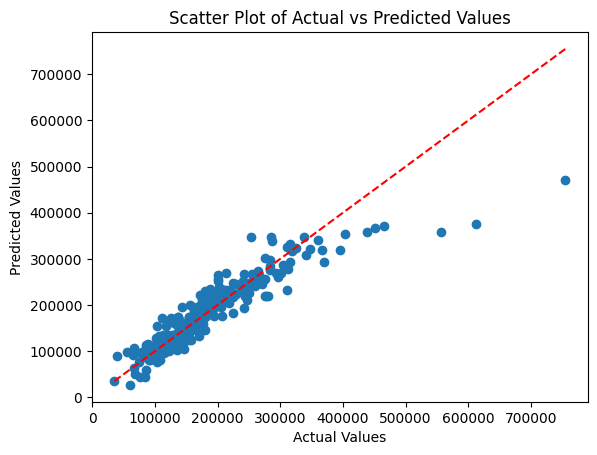

In [111]:
y_pred, y_test = OLS(X=X,y=y,Return=True,Print=False)
predict_scatter(y=y_test,y_pred=y_pred)

## Test Random Forest Model

In [112]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
model = rf.fit(X_train,y_train)
rf_pred = model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print('Test score for unseen (Predicted) data :')
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Test score for unseen (Predicted) data :
Mean Squared Error (MSE): 806585068.3029588
R-squared (R2): 0.8948434464824735


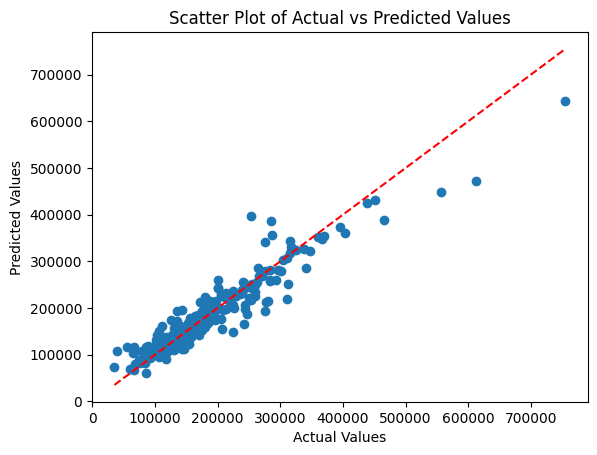

In [114]:
predict_scatter(y=y_test,y_pred=rf_pred)

<Axes: title={'center': 'Model Coefficient'}>

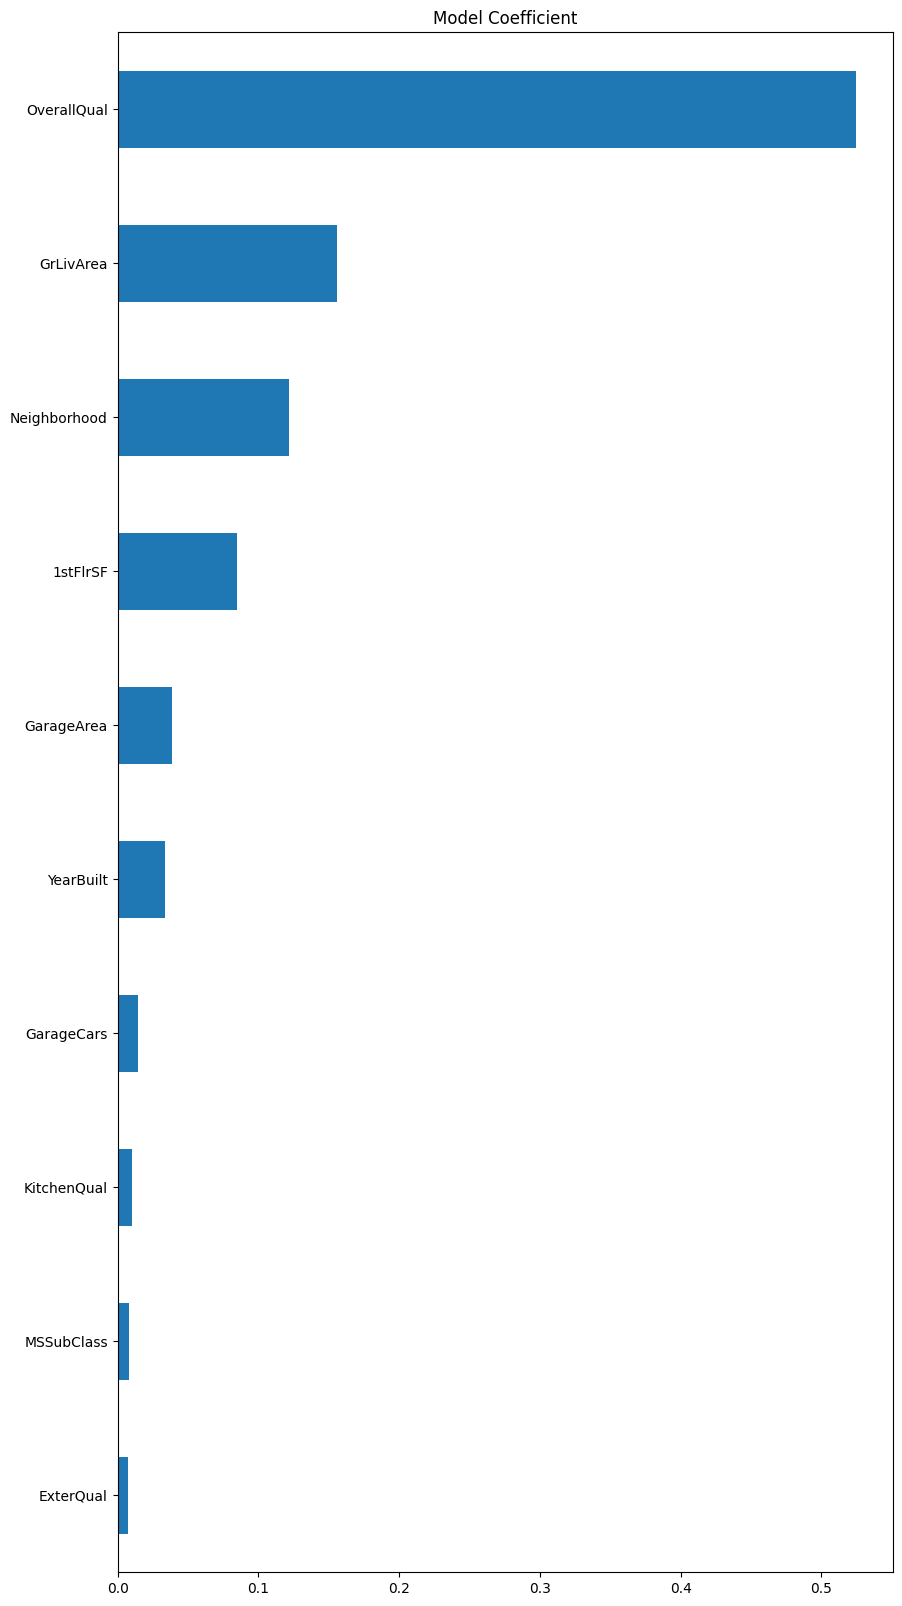

In [115]:
predictor = X.columns
coef = Series(abs(model.feature_importances_),predictor).sort_values(ascending=False).head(20)
plt.figure(figsize=[10,20])
coef.sort_values(ascending=True).plot(kind='barh', title='Model Coefficient')

#### RF with only top 5 features

In [ ]:
X_rf1 = X[['OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','GarageArea']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf1, y, test_size=0.2, random_state=42)

In [117]:
rf = RandomForestRegressor()
model = rf.fit(X_train,y_train)
rf_pred = model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print('Test score for unseen (Predicted) data :')
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Test score for unseen (Predicted) data :
Mean Squared Error (MSE): 855000219.697341
R-squared (R2): 0.8885314396542611


In [ ]:
predict_scatter(y=y_test,y_pred=rf_pred)